<a href="https://colab.research.google.com/github/Sandmorh/Paola.Moreno/blob/main/Moreno_Herrera_Sandra_Paola_Ejercicio_TM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# Descarga de archivos de ProfNER
!wget https://zenodo.org/record/4563995/files/profner.zip?download=1
# Si el unzip no funciona, revisar cual es el nombre de descarga del archivo
!unzip  profner.zip?download=1

Se han truncado las √∫ltimas 5000 l√≠neas del flujo de salida.
  inflating: profner/subtask-1/test-background-txt-files/1243953060050763778.txt  
  inflating: profner/subtask-1/test-background-txt-files/1243988693947486209.txt  
  inflating: profner/subtask-1/test-background-txt-files/1244173600753618945.txt  
  inflating: profner/subtask-1/test-background-txt-files/1244319340062822405.txt  
  inflating: profner/subtask-1/test-background-txt-files/1247000104193712129.txt  
  inflating: profner/subtask-1/test-background-txt-files/1247263989249212416.txt  
  inflating: profner/subtask-1/test-background-txt-files/1247465550931988482.txt  
  inflating: profner/subtask-1/test-background-txt-files/1249075777544556545.txt  
  inflating: profner/subtask-1/test-background-txt-files/1249253729720766466.txt  
  inflating: profner/subtask-1/test-background-txt-files/1249964965546668034.txt  
  inflating: profner/subtask-1/test-background-txt-files/1249980196838682624.txt  
  inflating: profner/sub

Funciones de carga y preparaci√≥n de datos

In [2]:
import nltk
import sys  
!{sys.executable} -m pip install contractions
!pip install spacy==3.2.1
!python -m spacy download en_core_web_sm
nltk.download('punkt')
nltk.download('stopwords')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 289.9/289.9 kB 11.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 110.8/110.8 kB 11.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6.1/6.1 MB 74.1 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 659.5/659.5 kB 48.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 126.0/126.0 kB 12.6 MB/s eta 0:00:00
  Attempting un

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
import sys
import os
import pandas as pd
def get_tweet_content(list_paths):
  """
    Funci√≥n para guardar en un diccionario el contenido de archivos txt 
    que se introduce en su entrada. 
    Devuelve un diccionario en el que las claves son el id del tweet, y
    el valor el texto del tweet.
  """
  output_dict = dict()
  for i in list_paths:
    tweet_id = i.split("/")[-1].split(".txt")[0]
    with open(i) as f:
      output_dict[int(tweet_id)] = f.read()
  
  return output_dict

def get_profner_data(profner_path_data):
    # Obtenemos el path a los txt de los tweets.
    path_to_txt = profner_path_data+"subtask-1/train-valid-txt-files/"
    tweets_train_files = [path_to_txt+"train/"+i for i in os.listdir(path_to_txt+"train/")]
    tweets_valid_files = [path_to_txt+"valid/"+i for i in os.listdir(path_to_txt+"valid/")]
    # Obtenemos diccionarios en los que el key es el tweet_id y el value el texto del tweet.
    train_txt_content = get_tweet_content(tweets_train_files)
    valid_txt_content = get_tweet_content(tweets_valid_files)

    # Cargamos dos dataframes con los tweet_id y la categor√≠a de los tweets
    path_to_labeled = profner_path_data+"subtask-1/"
    train_tweets = pd.read_csv(path_to_labeled+"train.tsv",sep="\t")
    valid_tweets = pd.read_csv(path_to_labeled+"valid.tsv",sep="\t")

    # Introducimos a los df el campo de texto mapeando los diccionarios con tweet_id
    train_tweets["tweet_text"] = train_tweets['tweet_id'].map(train_txt_content)
    train_tweets["set"] = "train"
    valid_tweets["tweet_text"] = valid_tweets['tweet_id'].map(valid_txt_content)
    valid_tweets["set"] = "valid"

    # Concatenamos el resultado
    output_df = pd.concat([train_tweets,valid_tweets],axis=0)
    # Eliminamos retorno de carro
    output_df["tweet_text"] = output_df.tweet_text.apply(lambda x: x.replace('\n', ' '))
    return output_df[["tweet_id","tweet_text","label","set"]].reset_index(drop=True)

  

# Ejercicio

En este ejercicio se trabajar√° con un conjunto de datos reales publicados para la shared-task [ProfNER](https://temu.bsc.es/smm4h-spanish/), celebrada en el a√±o 2021. Espec√≠ficamente, se utilizar√°n los datos textuales de la subtarea 1, centrada en la clasificaci√≥n de textos. Este conjunto de datos son tweets en espa√±ol que tienen asignada una etiqueta num√©rica, que representa la presencia (valor 1) o no (valor 0) de menciones de profesiones en el tweet. Por si fuera de tu inter√©s, el proceso de obtenci√≥n, selecci√≥n y anotaci√≥n de datos est√° descrita en [este enlace.](https://temu.bsc.es/smm4h-spanish/?p=4003).

Para el ejercicio deb√©is entrenar diferentes modelos de clasificaci√≥n que permitan clasificar correctamente los tweets. Para ello ser√° necesario crear y utilizar funciones de preprocesado de datos similares a las vistas en clase, aplicar estrategias de vectorizaci√≥n de trextos como TF-IDF o embeddings, y entrenar/evaluar modelos de clasificaci√≥n. Para que os sirva de orientaci√≥n, los criterios de evaluaci√≥n del ejercicio ser√°n los siguientes:

-	**An√°lisis exploratorio, pre-procesado y normalizaci√≥n de los datos (30%)**:
        -	El ejercicio deber√° contener un an√°lisis exploratorio de los datos como n√∫mero de documentos, gr√°ficas de distribuci√≥n de longitudes y/o wordclouds, entre otros an√°lisis que se os pudieran ocurrir. Vuestros ejercicios deber√°n incorporar al menos los an√°lisis exploratorios vistos en clase.

    -	Tambi√©n tendr√©is que tener funciones para normalizar textos que permitan eliminar palabras vac√≠as, quitar s√≠mbolos de puntuaci√≥n y lematizar o hacer stemming.  

-	**Vectorizaci√≥n de textos (40%)**

    En clase hemos visto diferentes estrategias de vectorizaci√≥n como TF-IDF y Word Embeddings. Tambi√©n hemos visto como incorporar caracter√≠sticas adicionales utilizando el sentimiento de los documentos. Para este ejercicio sois libres de utilizar la estrategia de vectorizaci√≥n que quer√°is, pero:
  -	Si decid√≠s utilizar TF-IDF ser√° necesarios que incorpor√©is a modelo caracter√≠sticas adicionales de sentimiento utilizando recursos adicionales (como por ejemplo la librer√≠a TextBlob). 
  -	Si opt√°is por representar el texto mediante embeddings, dado que en clase no se profundizado sobre el tema no ser√° necesario incorporar esas caracter√≠sticas adicionales. Si decid√≠s esta segunda opci√≥n, pod√©is utilizar los embeddings en espa√±ol que vimos en clase

-	**Entrenamiento y validaci√≥n del sistema (30%)**
  -	En el proceso de entrenamiento del modelo tendr√©is que testear al menos 3 modelos de clasificaci√≥n. El procedimiento debe ser similar al visto en clase, en el que primero estim√°bamos el rendimiento de varios algoritmos de forma general, para posteriormente seleccionar el mejor para ajustar los hiperpar√°metros.

## 0. Imports

In [4]:
!python -m spacy download es_core_news_sm
!pip install tweet-preprocessor
!pip install unidecode
!pip install emoji_extractor
!pip install emoji
!pip install pysentimiento
!pip install contractions
!pip install spacy
!pip install tqdm

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import string 
import re 
import sys
import contractions 
import emoji
import string
import spacy


from wordcloud import WordCloud

from tqdm.autonotebook import tqdm
tqdm.pandas()

from tqdm import tqdm
nltk.download('punkt')
nltk.download('stopwords')


import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from tqdm.autonotebook import tqdm
tqdm.pandas()

from nltk.stem.snowball import SnowballStemmer

import preprocessor as p
from unidecode import unidecode
from emoji_extractor.extract import Extractor


from textblob import Word 
from tqdm.auto import tqdm
from tqdm.autonotebook import tqdm
tqdm.pandas()


!pip install nltk
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('spanish'))

nltk.download('stopwords')

# para tratamiento tildes
!pip install unidecode
from unidecode import unidecode


# Pendientes:  import contractions  from tqdm.autonotebook import tqdm
#tqdm.pandas()

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import classification_report



2023-05-25 10:06:45.889347: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-25 10:06:47.588240: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
DEPRECATION: https://github.com/explosion/spacy-models/releases/download/es_core_news_sm-3.2.0/es_core_news_sm-3.2.0-py3-none-any.whl#egg=es_core_news_sm==3.2.0 contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

<ipython-input-4-8ada97519f28>:26: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 1. Obtenci√≥n del corpus
Para la obtenci√≥n de los datos teneis disponible la funci√≥n `get_profner_data()`. Esta funci√≥n prepara los datos del ejercicio en formato Pandas dataframe para que podais realizarlo.

In [5]:
profner_path = "./profner/"
datos_ejercicio = get_profner_data(profner_path)

In [6]:
datos_ejercicio.head(5)

tweet_id                                         tweet_text  \
0  1256007275807997953  CHINA: libera una pandemia EE.UU: libera OVNIS...   
1  1257909427677601792  San Francisco (EEUU) hace 100 a√±os tras vivir ...   
2  1281580572415066112  Porfi poneos la mascarilla o tendremos 28 nuev...   
3  1271348112733470720  El nuevo ‚Äûcovid normas y reglas recibimiento‚Äú ...   
4  1270421287148695556  Si el confinamiento ha dejado algo tocada tu e...   

   label    set  
0      0  train  
1      0  train  
2      0  train  
3      0  train  
4      0  train

## 2. An√°lisis exploratorio de los datos (EDA)

Vamos a proceder con la validaci√≥n del n√∫mero de tweets, las columnas, si tenemos vacios o duplicados y la distribuci√≥n del dataset.
Tambi√©n vamos a realizar un histograma y validaremos algunos ejemplos de tweets.

In [7]:
print("Tenemos un conjunto de {} tweets".format(len(datos_ejercicio)))
print("El dataframe tiene {} columnas".format(datos_ejercicio.shape[1]))


Tenemos un conjunto de 8000 tweets
El dataframe tiene 4 columnas


In [8]:
print("Existen {} tweets duplicados".format(np.sum(datos_ejercicio.duplicated(subset=["tweet_text"]))))
# No se tiene tweets duplicados 

Existen 0 tweets duplicados


In [9]:
print("Hay {} valores vac√≠os en las tweets y {} valores vac√≠os en las etiquetas en los datos".format(np.sum(datos_ejercicio.isnull())[0],
                                                                                              np.sum(datos_ejercicio.isnull())[1]))

# No se tienen valores vacios

Hay 0 valores vac√≠os en las tweets y 0 valores vac√≠os en las etiquetas en los datos


In [10]:
# N√∫mero de elementos de cada clase de la parte de entrenamiento
datos_ejercicio[datos_ejercicio['set'] == 'train']["label"].value_counts()

# Vemos que esta desbalanceado, por lo que debemos proceder con el proceso de balanceo. 

0    4607
1    1393
Name: label, dtype: int64

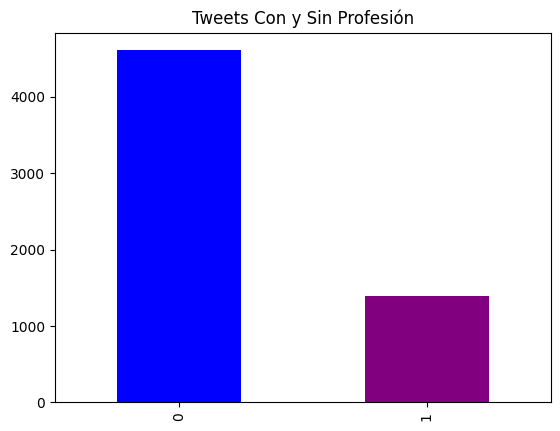

In [11]:
# vamos a proceder el histograma, aunque ya sabemos que no esta balanceado.

ax, fig = plt.subplots()
etiquetas = datos_ejercicio[datos_ejercicio['set'] == 'train']["label"].value_counts()
etiquetas.plot(kind= 'bar', color= ["blue", "purple"])
plt.title('Tweets Con y Sin Profesi√≥n')
plt.show()


Validar Contenido

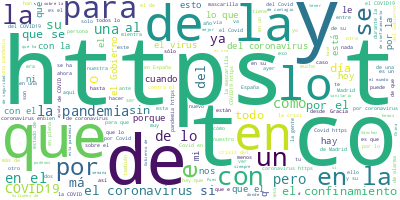

In [12]:
# Une las frases
long_string = ','.join(list(datos_ejercicio[datos_ejercicio['set'] == 'train']['tweet_text'].values))
# Genera un objecto WordCloud 
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=0, contour_color='purpleblue')
# Genera el wordcloud
wordcloud.generate(long_string)
# Visualizalo en una imagen
wordcloud.to_image()

# Vamos referencias a la pandemia, virus, COVID y Coronavirus. el HTTPS nos indica que se mencionaban paginas WEB. Tenemos conectores 

Tweets con Menci√≥n de profesi√≥n

In [13]:
# Vamos a revisar alg√∫nos de los tweets de cada tipo.

datos_ejercicio[datos_ejercicio.label==1].sample(3).tweet_text.to_list()

['@AntonioMaestre @lau_valero ¬øPor qu√© le dejas el virus a tus padres en casa y tienen todo el tiempo que contin√∫e activo para tocarlo y contagiarse? No lo s√©, no soy m√©dico, por eso no discuto vehementemente particularidades de un plan preparado por especialistas.',
 'Una novela intensa de principio a fin. Recorre las calles de Barcelona y descubre la terrible conspiraci√≥n que llevar√° al doctor Nicol√°s Dalmau a vivir la experiencia m√°s extraordinaria de su vida.  üëâhttps://t.co/flVHeYbekQ Gratis en #KindleUnlimited  #yomequedoencasa #leeindie https://t.co/qZy1td2t8F',
 '¬°Hoy,  siento verg√ºenza del Presidente de mi pa√≠s! Espero d√© explicaciones del motivo tan importante que  le ha impedido asistir al funeral de los fallecidos por la pandemia https://t.co/1mulrhgpPI']

Tweets Sin Menci√≥n de profesi√≥n

In [14]:
datos_ejercicio[datos_ejercicio.label==0].sample(3).tweet_text.to_list()

['üèõ @sanchezcastejon Llevamos 11 d√≠as de estado de alarma, volcados en mitigar el virus.  1‚É£ Proteger a la poblaci√≥n m√°s expuesta 2‚É£ Blindar el sistema de salud 3‚É£ Proteger a la poblaci√≥n  Medidas de m√°ximo distanciamiento social para reducir contagios.  #EsteVirusLoParamosUnidos https://t.co/SQIIt5uJ70',
 'Casi 200 ni√±os y ni√±as palestinos permanecen detenidos en c√°rceles israel√≠es, la mayor√≠a a falta de juicio, en condiciones que no garantizan su protecci√≥n contra el coronavirus. Nuestra compa√±era @clairenicoll conoce bien su historia y la relata aqu√≠ https://t.co/InszWYlTXu',
 '#ULTIMAHORA | La Generalitat ordena el confinamiento domiciliario en la ciudad de Lleida y otros siete municipios de su comarca por el rebrote de coronavirus.']

Distribuci√≥n de la longitud de los tweets en caracteres:

<ipython-input-15-f0c402bcfb24>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt1 = sns.distplot(datos_ejercicio[datos_ejercicio["label"]==0].char_len, hist=True, label="Sin Profesi√≥n",color="blue")
<ipython-input-15-f0c402bcfb24>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt2 = sns.distplot(datos_ejercicio[d

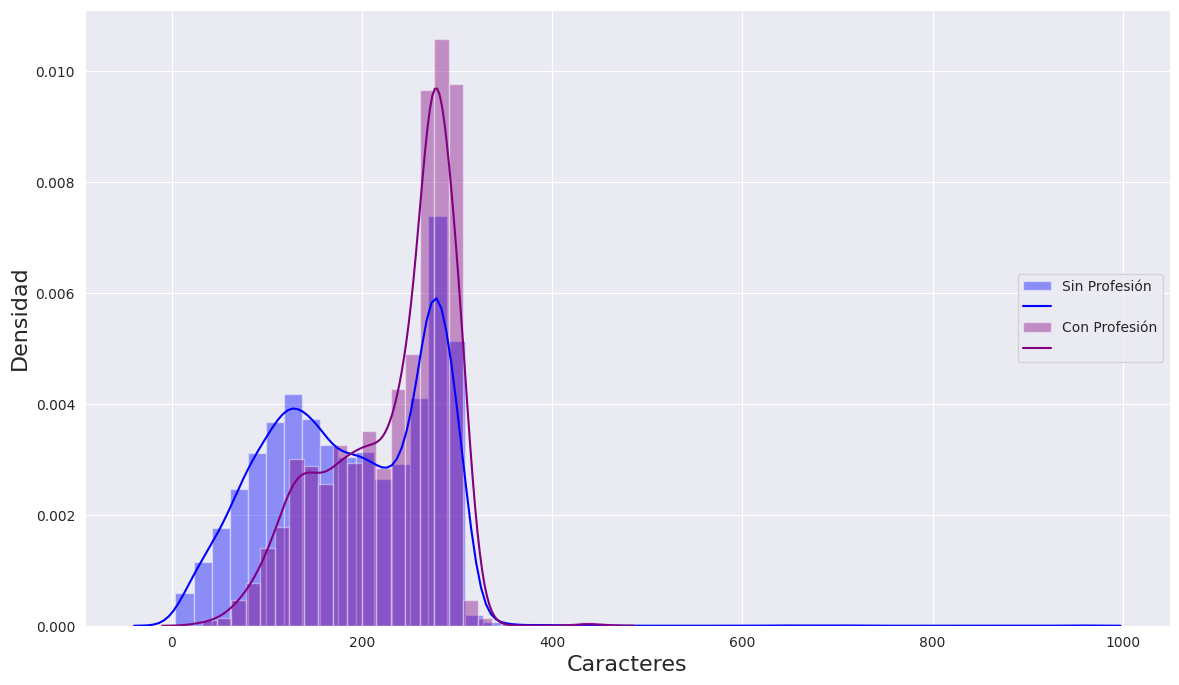

In [15]:
datos_ejercicio["char_len"] = datos_ejercicio["tweet_text"].apply(lambda x: len(x))

fig = plt.figure(figsize=(14,8))
sns.set_style("darkgrid")
# a√±adimos series para cada categor√≠a (eligiendo la ser√≠e de char_len
plt1 = sns.distplot(datos_ejercicio[datos_ejercicio["label"]==0].char_len, hist=True, label="Sin Profesi√≥n",color="blue")
plt2 = sns.distplot(datos_ejercicio[datos_ejercicio["label"]==1].char_len, hist=True, label="Con Profesi√≥n",color="purple")
plt.legend(labels=['Sin Profesi√≥n',"",'Con Profesi√≥n',""], loc = 5)

# Definimos el t√≠tulo de los ejes:
plt.xlabel('Caracteres', fontsize=16)
plt.ylabel('Densidad', fontsize=16)

# Finalmente mostramos el gr√°fico:
plt.show()

los  tweets en los que se mencionan profesiones suelen tener una logitud un poco mayor a las que no tienen y la densidad es m√°s alta pero no es deteminante para poder construir un clasificador.

Ahora vamos a ver la distribuci√≥n para solo para la parte de train. 
* Primero separamos el dataset

In [16]:
datos_ejercicio['set'].value_counts()

train    6000
valid    2000
Name: set, dtype: int64

In [17]:
datos_ejercicio_train = datos_ejercicio[datos_ejercicio['set'] == 'train']
datos_ejercicio_test = datos_ejercicio[datos_ejercicio['set'] == 'valid']

<ipython-input-18-3225e1b6e086>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_ejercicio_train["char_len"] = datos_ejercicio_train["tweet_text"].apply(lambda x: len(x))
<ipython-input-18-3225e1b6e086>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt1 = sns.distplot(datos_ejercicio_train[datos_ejercicio_train["label"]==0].char_len, hist=True, label="Sin Profesi√≥n", color="blue")
<ipython-input-18-3225e

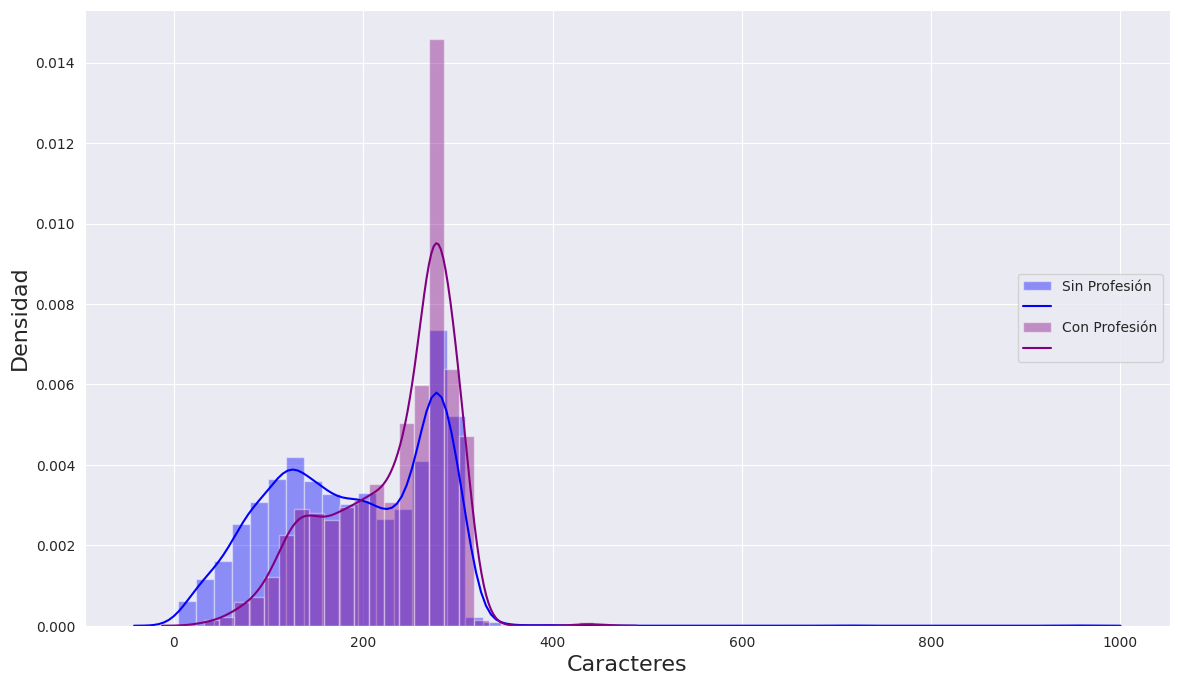

In [18]:
datos_ejercicio_train["char_len"] = datos_ejercicio_train["tweet_text"].apply(lambda x: len(x))

fig = plt.figure(figsize=(14,8))
sns.set_style("darkgrid")
# a√±adimos series para cada categor√≠a (eligiendo la ser√≠e de char_len
plt1 = sns.distplot(datos_ejercicio_train[datos_ejercicio_train["label"]==0].char_len, hist=True, label="Sin Profesi√≥n", color="blue")
plt2 = sns.distplot(datos_ejercicio_train[datos_ejercicio_train["label"]==1].char_len, hist=True, label="Con Profesi√≥n", color="purple")
plt.legend(labels=['Sin Profesi√≥n',"",'Con Profesi√≥n',""], loc = 5)

# Definimos el t√≠tulo de los ejes:
plt.xlabel('Caracteres', fontsize=16)
plt.ylabel('Densidad', fontsize=16)

# Finalmente mostramos el gr√°fico:
plt.show()

## 3. Preprocesado y Normalizaci√≥n

Vamos a proceder a normalizar los datos. Para ello vamos a utilizar las funciones anteriormente definidas:

- Preprocesar los textos:
    
    - Tokenizaremos
    - Quitaremos stop words
    - Quitaremos puntuaci√≥n
    - Lematizaremos ( No se puede usar WordNet por ser espa√±ol)
    - Stemming 
    - En esta ocasi√≥n no extraeremos los emojis ni expanderemos las contracciones. 
    

Algoritmo de SnowballStemmer: Algoritmo de Stemming que soporta 13 lenguas en NLTK, incluyendo espa√±ol. Es una versi√≥n mejorada del algoritmo de de Porter Stemming.

Preprocesamiento textos

In [19]:
# Eliminar espacios
def eliminar_espacios(text): 
    return  " ".join(text.split()) 

# To lower
def texto_to_lower(text):
  return text.lower()


from nltk.tokenize import TweetTokenizer
# Tokenizar los tweets con el tokenizador "TweetTokenizer" de NLTK
def tokenize(texto):
  tweet_tokenizer = TweetTokenizer()
  tokens = tweet_tokenizer.tokenize(texto)
  return tokens

# Quitar stop words
from nltk.corpus import stopwords
def quitar_stopwords(tokens):
    stop_words = set(stopwords.words('spanish')) 
    filtered_sentence = [w for w in tokens if not w in stop_words]
    return filtered_sentence


# Eliminar signos de puntuaci√≥n (nos quedamos s√≥lo lo alfanum√©rico en este caso)
def quitar_puntuacion(tokens):
    words=[word for word in tokens if word.isalnum()]
    return words


# Lemmatization

nlp = spacy.load("es_core_news_sm")
def lematizar(tokens):
    sentence = " ".join(tokens)
    mytokens = nlp(sentence)
    # Lematizamos los tokens y los convertimos  a minusculas
    mytokens = [ word.lemma_ if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    # Extraemos el text en una string
    return " ".join(mytokens)

stemmer = SnowballStemmer(language="spanish")
def stem(tokens):
    tokens = [ stemmer.stem(token) for token in tokens]
    return tokens

/usr/local/lib/python3.10/dist-packages/spacy/util.py:887: UserWarning: [W095] Model 'es_core_news_sm' (3.2.0) was trained with spaCy v3.2 and may not be 100% compatible with the current version (3.5.3). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


Preprocesamiento Tweets

In [20]:
def preprocess_tweets(sentence):
  #elimina espacios
  sentence = eliminar_espacios(sentence)
  #convierte a minusculas
  sentence= texto_to_lower(sentence)
 
  # Tokenizar
  sentence=  tokenize(sentence)
  #Quitar Stopwords
  sentence = quitar_stopwords(sentence)
  # Quitar puntuaci√≥n
  sentence =  quitar_puntuacion(sentence)
 
  # Stemming
  #sentence = stem(sentence)
  # lematizaci√≥n (mediante spacy)
  sentence =  lematizar(sentence)
   # quitar tildes
  sentence = unidecode(sentence)
  return sentence

Extraemos sentimiento de los tweets

In [21]:
def extrae_emojis(texto):
  extract = Extractor()
  emojis = extract.count_emoji(texto, check_first=False)
  emojis_list = [key for key, _ in emojis.most_common()]
  #reemplazar los emojis por su descripcion 
  emojis_description = emoji.demojize( " ".join(emojis_list),language= 'es' )
  emojis_desc_final = emojis_description.replace(":","")
  emojis_desc_final = emojis_desc_final.replace("_"," ")

  emojis_blob = emojis_desc_final.split()
  emojis_lemmas = [Word(x).lemmatize("v") for x in emojis_blob]
  emojis_lemmas = " ".join(emojis_lemmas)
  return emojis_lemmas


In [22]:
emojis_train = datos_ejercicio_train["tweet_text"].apply(lambda x: extrae_emojis(x))
emojis_test = datos_ejercicio_test["tweet_text"].apply(lambda x: extrae_emojis(x))


datos_ejercicio_train['tweet_text'] = datos_ejercicio_train['tweet_text'].apply(lambda x: emoji.replace_emoji(x, ''))
datos_ejercicio_test['tweet_text'] = datos_ejercicio_test['tweet_text'].apply(lambda x: emoji.replace_emoji(x, ''))


# a√±adimos las  descripciones al dataset
datos_ejercicio_train["tweet_text"] = (datos_ejercicio_train["tweet_text"]+' '+emojis_train)
datos_ejercicio_test["tweet_text"] = (datos_ejercicio_test["tweet_text"]+' '+emojis_test)

<ipython-input-22-9150bcea3255>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_ejercicio_train['tweet_text'] = datos_ejercicio_train['tweet_text'].apply(lambda x: emoji.replace_emoji(x, ''))
<ipython-input-22-9150bcea3255>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_ejercicio_test['tweet_text'] = datos_ejercicio_test['tweet_text'].apply(lambda x: emoji.replace_emoji(x, ''))
<ipython-input-22-9150bcea3255>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [23]:
datos_ejercicio_normal = datos_ejercicio_train["tweet_text"].apply(lambda x: preprocess_tweets(sentence = x))

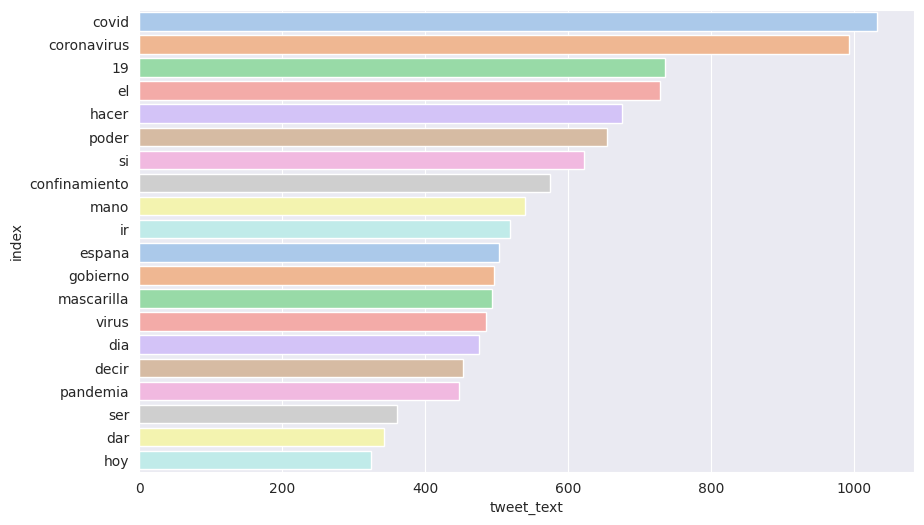

In [24]:
datos_ejercicio_normal = datos_ejercicio_normal.apply(lambda x: x.split(' '))
datos_ejercicio_normal= datos_ejercicio_normal.explode()

# Top 20 words with stopwords
plt.figure(figsize=(10, 6))
counts  = datos_ejercicio_normal.value_counts(ascending=False).reset_index().head(20)
sns.barplot(data = counts, y = 'index', x = 'tweet_text', orient= 'h', palette= 'pastel')
plt.show()

In [25]:
Xtrain = pd.DataFrame(datos_ejercicio_train["tweet_text"].progress_apply(lambda x: preprocess_tweets(sentence = x)))
Xtest = pd.DataFrame(datos_ejercicio_test["tweet_text"].progress_apply(lambda x: preprocess_tweets(sentence = x)))


  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

In [26]:
Xtrain["token_len"] = Xtrain["tweet_text"].apply(lambda x: len(x))
Xtrain['label'] = datos_ejercicio_train['label']

Xtest["token_len"] = Xtest['tweet_text'].apply(lambda x: len(x))
Xtest['label'] = datos_ejercicio_test['label']

Xtrain.head()


tweet_text  token_len  label
0  china libera pandemia liberar ovnis argentino ...         75      0
1  san francisco eeuu hacer 100 ano tras vivir pa...         57      0
2  porfi poneo mascarillar 28 nuevo cancion artis...         66      0
3  nuevo covid norma regla recibimiento comercio ...        139      0
4  si confinamiento dejado tocado estabilidad men...        106      0

<ipython-input-27-06a93399e9c6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt1 = sns.distplot(Xtrain[Xtrain["label"]==0]["token_len"], hist=True, label="0", color="blue" )
<ipython-input-27-06a93399e9c6>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt1 = sns.distplot(Xtrain[Xtrain["label"]==1]["token_len"], h

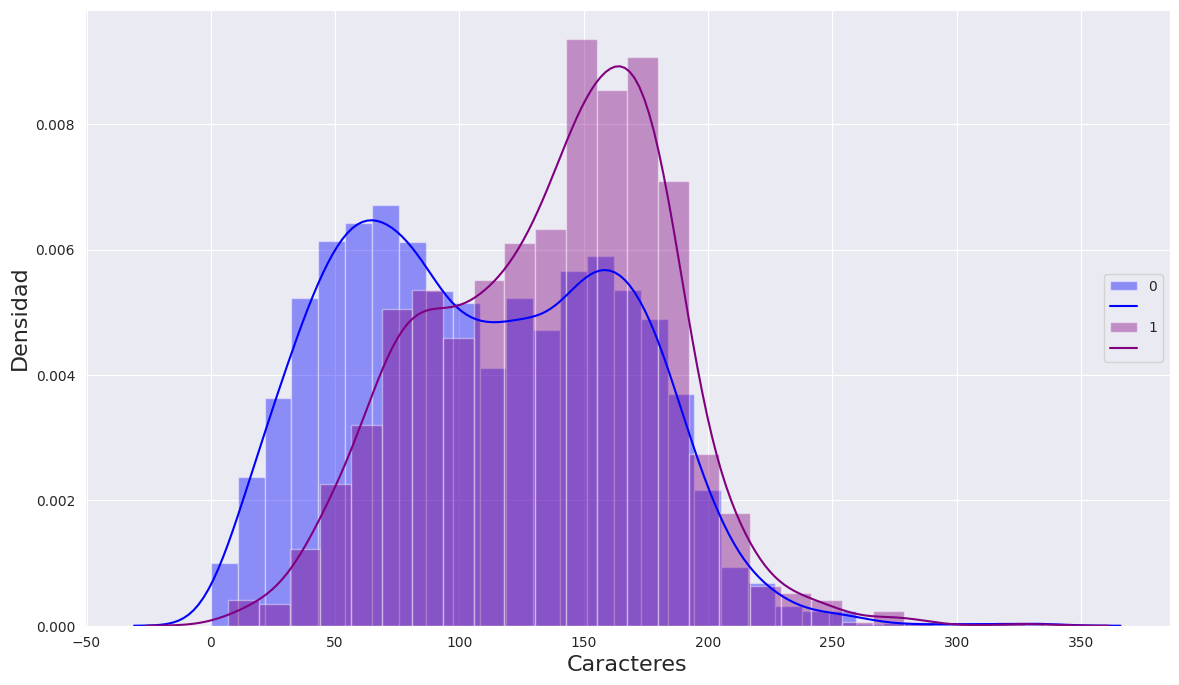

In [27]:
fig = plt.figure(figsize=(14,8))
sns.set_style("darkgrid")
plt1 = sns.distplot(Xtrain[Xtrain["label"]==0]["token_len"], hist=True, label="0", color="blue" )
plt1 = sns.distplot(Xtrain[Xtrain["label"]==1]["token_len"], hist=True, label="1", color="purple")

plt.legend(labels=['0',"",'1',""], loc = 5)

# Definimos el t√≠tulo de los ejes:
plt.xlabel('Caracteres', fontsize=16)
plt.ylabel('Densidad', fontsize=16)

plt.show()

Para espa√±ol vamos a usar VADER Sentiment Analysis Multilanguage y para extraer sentimientos.


In [28]:
!pip install vader-multi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 126.7/126.7 kB 6.2 MB/s eta 0:00:00


In [29]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [30]:
def get_sentiment_scores(tweet):
  scores = analyzer.polarity_scores(tweet)
  return pd.Series([scores['pos'], scores['neg'], scores['neu']])


In [31]:
# a√±adimos las nuevas columnas al dataframe

sentiment_scores = Xtrain['tweet_text'].apply(get_sentiment_scores)
sentiment_scores.columns = ['pos', 'neg', 'neu']
Xtrain = Xtrain.join(sentiment_scores)


Xtrain.head()

tweet_text  token_len  label    pos  \
0  china libera pandemia liberar ovnis argentino ...         75      0  0.000   
1  san francisco eeuu hacer 100 ano tras vivir pa...         57      0  0.000   
2  porfi poneo mascarillar 28 nuevo cancion artis...         66      0  0.187   
3  nuevo covid norma regla recibimiento comercio ...        139      0  0.000   
4  si confinamiento dejado tocado estabilidad men...        106      0  0.233   

     neg    neu  
0  0.292  0.708  
1  0.000  1.000  
2  0.000  0.813  
3  0.000  1.000  
4  0.139  0.628

In [32]:
from tqdm import tqdm
# Espacios
datos_ejercicio["normaliza"] = datos_ejercicio["tweet_text"].progress_apply(lambda x: eliminar_espacios(x))
# To Lower
datos_ejercicio["normaliza"] = datos_ejercicio["normaliza"].progress_apply(lambda x: texto_to_lower(x))
# Quitar Tildes
datos_ejercicio["normaliza"] = datos_ejercicio["normaliza"].progress_apply(lambda x: unidecode(x))
#Tokenizar
datos_ejercicio["normaliza"] = datos_ejercicio["normaliza"].progress_apply(lambda x: tokenize(x))
# Quitar Stopwords
datos_ejercicio["normaliza"] = datos_ejercicio["normaliza"].progress_apply(lambda x: quitar_stopwords(x))
# Quitar puntuaci√≥n
datos_ejercicio["normaliza"] = datos_ejercicio["normaliza"].progress_apply(lambda x: quitar_puntuacion(x))
#Lematizaci√≥n
datos_ejercicio["normaliza"] = datos_ejercicio["normaliza"].progress_apply(lambda x: lematizar(x))

datos_ejercicio["normaliza"]

  0%|          | 0/8000 [00:00<?, ?it/s]

  0%|          | 0/8000 [00:00<?, ?it/s]

  0%|          | 0/8000 [00:00<?, ?it/s]

  0%|          | 0/8000 [00:00<?, ?it/s]

  0%|          | 0/8000 [00:00<?, ?it/s]

  0%|          | 0/8000 [00:00<?, ?it/s]

  0%|          | 0/8000 [00:00<?, ?it/s]

0       china libera pandemia liberar ovnis argentino ...
1       san francisco eeuu hacer 100 ano tras vivir pa...
2       porfi poneo mascarillar 28 nuevo canci√≥n artis...
3       nuevo covid norma regla recibimiento comercio ...
4       si confinamiento dejado tocado estabilidad men...
                              ...                        
7995    nuevo infectado coronavirus multiplicar casi 2...
7996    ayuso adjudico dedo contrato euros hacer video...
7997    mes encerrado poder viajar provincia ir restau...
7998    gobierno prohibir ley lis despido crisis coron...
7999                              rasgo psicologico lleva
Name: normaliza, Length: 8000, dtype: object

Funci√≥n de transformaci√≥n que aglutinara todas las anteriores y pas√°rsela al siguiente paso (TfidfVectorizer) en el campo analyzer. Para ver el proceso de cada uno de los pasos lo haremos paso a paso.


Como explicamos ayer, se ha hecho el preprocesado, y antes de introducirlo a TFIDF vamos a generar una frase de gada una de las listas de tokens, para utilizar el propio tokenizador de TFIDF.

In [33]:
datos_ejercicio["clean_text"] = datos_ejercicio["normaliza"].apply(lambda x: " ".join(x))

<ipython-input-34-0b9e06f819a3>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt1 = sns.distplot(datos_ejercicio[datos_ejercicio["label"]==0]["token_len"], hist=True, label="Sin", color="blue")
<ipython-input-34-0b9e06f819a3>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt2 = sns.distplot(datos_ejercicio[datos_e

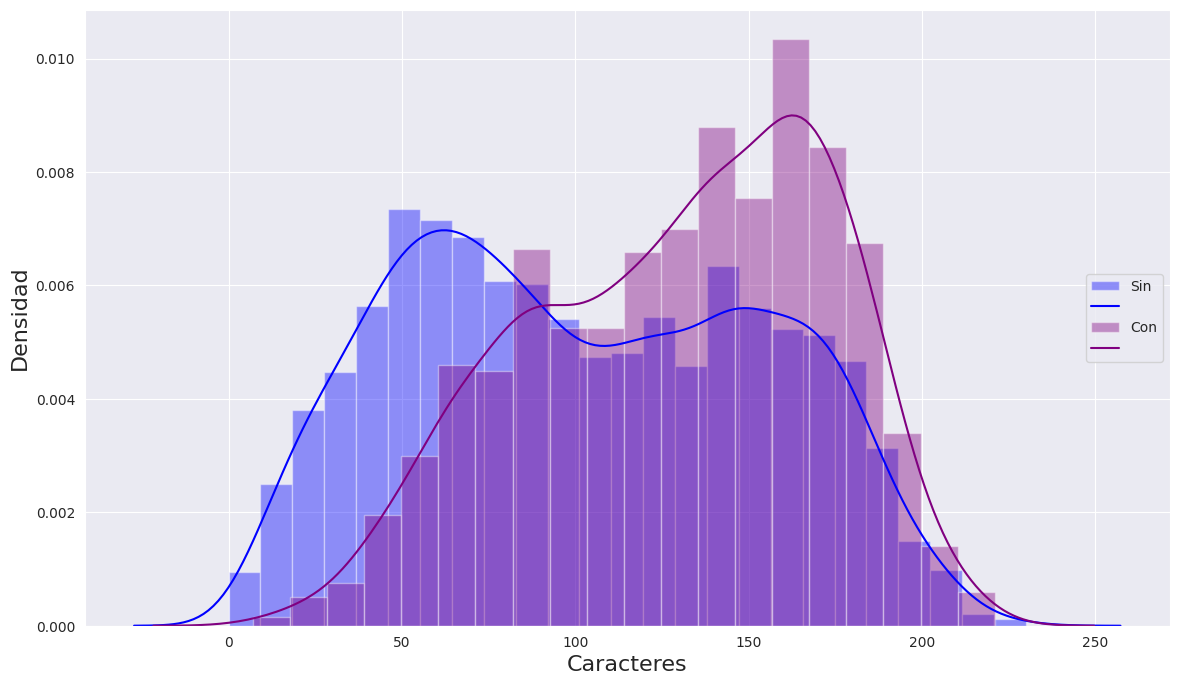

In [34]:
datos_ejercicio["token_len"] = datos_ejercicio["normaliza"].apply(lambda x: len(x))

fig = plt.figure(figsize=(14,8))
sns.set_style("darkgrid")
plt1 = sns.distplot(datos_ejercicio[datos_ejercicio["label"]==0]["token_len"], hist=True, label="Sin", color="blue")
plt2 = sns.distplot(datos_ejercicio[datos_ejercicio["label"]==1]["token_len"], hist=True, label="Con", color="purple")
plt.legend(labels=['Sin',"",'Con',""], loc = 5)

# Definimos el t√≠tulo de los ejes:
plt.xlabel('Caracteres', fontsize=16)
plt.ylabel('Densidad', fontsize=16)

plt.show()

## 4. Vectorizaci√≥n

In [35]:
vectorizador = TfidfVectorizer(lowercase = False, stop_words =None,
                               min_df=0.005, ngram_range = (1,3))

vector_data = vectorizador.fit_transform(Xtrain["tweet_text"])

In [36]:
import scipy as sp

#Unir las caracter√≠sticas TFIDF (contenidas en ¬¥vector_data¬¥) con las extrafeatures
extra_features = Xtrain[['pos','neg','neu', 'token_len']]

# Quitar las etiquetas y las asignamos a la variable y
y = Xtrain["label"].values.astype(np.float32) 


# Extraemos los valores (values) de las extra_features, que es un dataframe  
X = sp.sparse.hstack((vector_data,extra_features.values),format='csr')

In [37]:
X_columns=list(vectorizador.get_feature_names_out())+extra_features.columns.tolist()

Como vimos al inicio del EDA debemos efectuar el balanceo.

In [38]:
# Cargamos  
from imblearn.over_sampling import SMOTE 
# Creamos objetos
sm = SMOTE(random_state=99)
# Retransformamos
X_res, y_res = sm.fit_resample(X, y)
#X_res, y_res = sm.fit_resample(vector_data, Xtrain.label)

np.array(np.unique(y_res, return_counts=True)).T

array([[0.000e+00, 4.607e+03],
       [1.000e+00, 4.607e+03]])

# Entrenar/validar el clasificador:


Entramos ya en el apartado de entrenamiento del modelo. El primer paso es definir las variables predictoras, que son las caracter√≠sticas extraidas anteriormente a trav√©s de TF-IDF.

Tambi√©n especificaremos cual es la variable con las clases de cada documento.

In [39]:
# Importamos numpy:
import numpy as np

# Definimos la variable de categor√≠as:
y = datos_ejercicio["label"].values.astype(np.float32) 

print(y.shape)
vector_data

(8000,)


<6000x561 sparse matrix of type '<class 'numpy.float64'>'
	with 51517 stored elements in Compressed Sparse Row format>

## 5. Entrenamiento y evaluaci√≥n de modelos

In [40]:
# Definimos las funcionalidades pertinentes de sklearn:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings 
# Definimos la funci√≥n encargada de evaluar los modelos:
def model_evaluation(models, score, X, y):
      results = []
      names = []
      #PAra cada modelo
      for name, model in models:
          warnings.filterwarnings('ignore') 
          # Generamos un Kfold
          KF = KFold(n_splits = 10, shuffle = True, random_state = 98)

          # hacemos croos_val
          cv_results = cross_val_score(model, X, y, cv = KF, scoring = score, verbose = False)
          
          # Guardamos los resultados:
          results.append(cv_results)
          names.append(name)
          
          # Mostramos los resultados num√©ricamente:
          print('Metric: {} , KFold '.format(str(score)))
          print("%s: %f (%f) " % (name, cv_results.mean(), cv_results.std()))

      return results, names

In [41]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# Definimos los modelos y generamos una lista con cada uno de ellos:
models = []
models.append(("Logistic", LogisticRegression(random_state=42)))
models.append(("RandomForest", RandomForestClassifier(n_estimators=70, max_depth=7, random_state=42)))
models.append(("DecisionTree", DecisionTreeClassifier(random_state=42)))


evaluation_score = "accuracy"

model_evaluation(models,  evaluation_score, X_res, y_res) 

Metric: accuracy , KFold 
Logistic: 0.772087 (0.012235) 
Metric: accuracy , KFold 
RandomForest: 0.810723 (0.008701) 
Metric: accuracy , KFold 
DecisionTree: 0.820384 (0.013004) 


([array([0.77982646, 0.7537961 , 0.78416486, 0.76355748, 0.77198697,
         0.78175896, 0.77307275, 0.78067318, 0.78393051, 0.74809989]),
  array([0.81995662, 0.79934924, 0.81778742, 0.80694143, 0.81216069,
         0.81324647, 0.82627579, 0.80456026, 0.80998914, 0.79695983]),
  array([0.84598698, 0.80911063, 0.81019523, 0.79934924, 0.82736156,
         0.82193268, 0.82627579, 0.82953312, 0.82627579, 0.80781759])],
 ['Logistic', 'RandomForest', 'DecisionTree'])

Observamos un mejor funcionamiento con los mejores. En el caso del  RandomForest debemos tener cuidado con un posible overfitting. 
*  VAmos a usar un Grid para validar los posibles parametros:

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Definimos el modelo DecisionTree
model = DecisionTreeClassifier(random_state=42)

# Definimos los par√°metros a ajustar
param_grid = {
    "max_depth": [5, 10, 15],
    "min_samples_split": [2, 5, 10]
}

# Realizamos la b√∫squeda de cuadr√≠cula
grid_search = GridSearchCV(model, param_grid, scoring=evaluation_score, cv=5)
grid_search.fit(X_res, y_res)

# Imprimimos los resultados
print("Mejor modelo de DecisionTree encontrado:")
print(grid_search.best_estimator_)

Mejor modelo de DecisionTree encontrado:
DecisionTreeClassifier(max_depth=15, random_state=42)


Se realizo la prueba con los parametro recomendados, sin embargo tenemos un mejor resultado sin ajustar los parametros.

In [43]:
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
rf = DecisionTreeClassifier(random_state=42)

xtrain,xtest,ytrain,ytest = train_test_split(X_res,y_res)
rf.fit(xtrain,ytrain)
y_pred = rf.predict(xtest)
print(confusion_matrix(ytest,y_pred))
print(classification_report(ytest,y_pred))

[[884 274]
 [197 949]]
              precision    recall  f1-score   support

         0.0       0.82      0.76      0.79      1158
         1.0       0.78      0.83      0.80      1146

    accuracy                           0.80      2304
   macro avg       0.80      0.80      0.80      2304
weighted avg       0.80      0.80      0.80      2304



Matriz de confusi√≥n

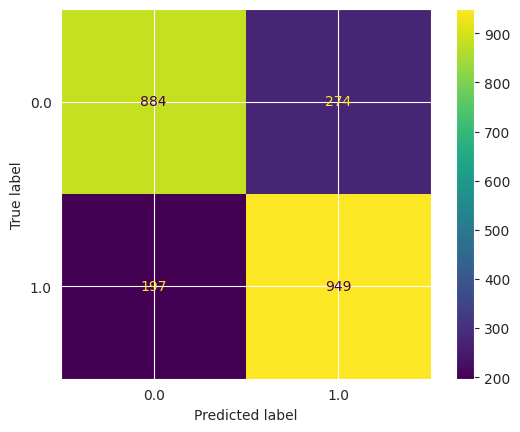

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(rf, xtest, ytest, normalize = None)

Variables

In [45]:
rf.fit(X_res,y_res)

df = pd.DataFrame({'feature': X_columns, 'importance': rf.feature_importances_})

df.sort_values('importance',ascending = False,inplace=True)

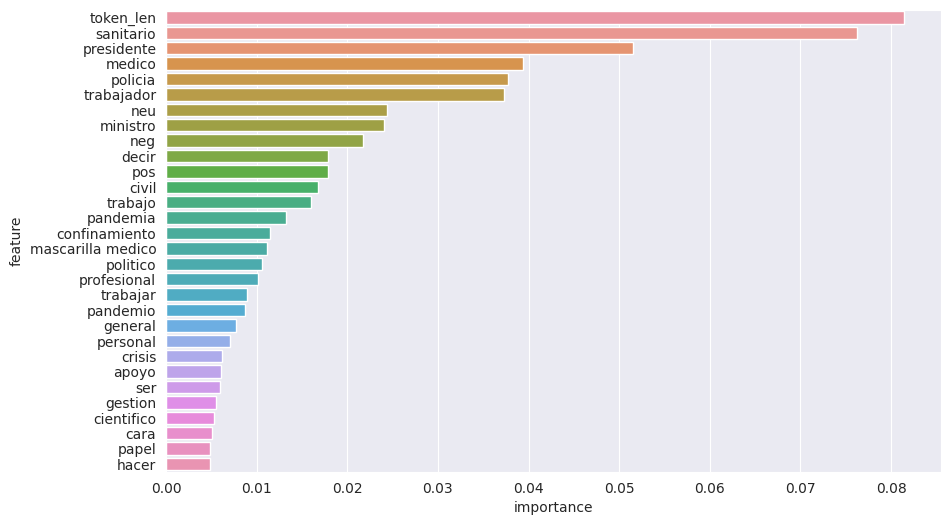

In [46]:
plt.figure(figsize=(10,6))
# cogemos s√≥lo las m√°s relevantes para que se vea el gr√°fico
sns.barplot(data = df.iloc[:30,:].sort_values('importance',ascending = False)
            , y = 'feature', x = 'importance' , orient = 'h')
plt.show()

Vemos que son palabras como santirario, presidentes, medico, policia, trabajo y ministro los m√°s relevantes. 

In [47]:
sentiment_scores = Xtest['tweet_text'].apply(get_sentiment_scores)
sentiment_scores.columns = ['pos', 'neg', 'neu']
Xtest = Xtest.join(sentiment_scores)

extra_features_test = Xtest[['pos','neg','neu', 'token_len']]

In [48]:
vector_data_test = vectorizador.transform(Xtest["tweet_text"])
# y = Xtest["label"].values.astype(np.float32)
X = sp.sparse.hstack((vector_data_test,extra_features_test.values),format='csr')


rf.predict(X)


array([0., 0., 1., ..., 0., 0., 0.], dtype=float32)